Выделить матрицу признаков и целевую переменную из загруженных данных.

### *РЕШЕНИЕ*

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('data.csv')
df.head(5)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,target
0,-1.979019,0.392456,1.195177,0.209349,-1.209435,0.868798,0.384209,-0.426571,-0.977939,-1.419877,-0.173544,-0.040606,-2.126833,0.781358,-1.492102,0.052373,-0.432660,0.114845,1.044025,0.107760,-0.096212,0.031622,1.355805,-0.926163,-0.034942,-1.224387,-1.758209,-1.739425,0.623526,0.740126,0.120635,0.862755,-0.207316,1.542547,0.381245,-0.480214,0.826839,0.715237,-0.552693,1.665142,...,0.258930,-0.108528,1.734042,-0.830070,-0.684812,0.280236,-1.858291,1.805417,0.114476,-1.408961,0.292169,-0.094269,0.727168,0.268851,-0.249894,-0.892773,1.045460,0.275002,0.079580,0.292149,-0.636876,-0.251118,-0.393351,1.242827,-1.859663,-1.249565,-0.104009,0.229924,0.023104,-0.435248,-1.587188,-0.612423,-0.281845,-0.625773,-0.907327,-0.800223,0.065892,0.271684,-0.201420,-45.587910
1,0.613518,0.051946,0.238789,-0.071601,-0.080717,1.727543,-0.483886,0.635172,0.038003,1.573987,-0.625563,-2.848543,0.996267,-0.025554,0.381935,1.172729,0.727630,2.142270,0.850222,-0.320347,1.148766,-0.493757,-0.535235,0.732640,1.317394,1.735964,1.683928,0.883660,0.698223,1.380091,1.500760,-0.257377,-0.646937,-0.483186,0.771699,-0.259042,0.224452,1.399355,-1.576392,0.346488,...,-1.739714,-1.464375,-0.651418,-1.668584,-0.467701,-0.573700,0.076822,0.393485,-1.225766,-0.321635,-0.024355,0.346504,-1.998201,-0.196350,0.424166,0.197911,0.543600,2.076748,-0.038508,0.522835,0.647196,-0.458884,0.924634,0.078635,1.160827,-1.119670,1.047098,0.260674,0.436324,-0.349258,0.059630,0.120031,0.399223,0.494030,0.197600,0.652323,0.916328,-1.556582,-0.370614,137.329473
2,0.444198,-0.535317,0.664927,-0.327017,1.935154,-1.776012,0.207803,0.126178,0.252569,0.889037,-0.477646,1.897289,-0.717016,1.088770,-1.010598,-0.376301,0.496199,0.418206,1.386349,-1.292625,0.156694,-1.284584,2.046862,0.511500,-0.674934,-0.550115,0.145521,-1.141009,0.435975,-0.413616,1.153590,0.466545,-0.098845,2.272435,1.695723,-0.924564,-1.288308,0.491429,-0.804966,-0.356673,...,1.023531,-1.276304,0.840734,1.346226,-0.454548,-0.077221,0.052258,-2.532246,0.573744,-0.361311,0.425844,-0.218653,-0.048089,-1.597599,-0.532169,-0.147025,0.018819,-0.064184,1.588627,-0.607354,-0.097915,-0.614123,0.569760,0.815501,0.131928,-1.336725,0.292715,-0.560608,1.063941,-2.603137,0.195482,1.384532,0.522251,-0.127655,-0.403076,-0.111509,-0.183150,0.977816,-1.171654,141.355900
3,-1.485186,-0.101987,0.817982,-0.846498,-0.660834,-0.073107,-0.247340,-0.775607,1.015937,-1.075737,0.342106,-1.128591,-0.734811,1.313782,0.662536,-0.015472,-0.755499,0.451226,-1.428905,-2.378996,0.972444,-1.399228,-0.498987,1.446944,1.744861,-1.177226,0.609880,0.470510,-0.667333,1.679747,-0.561930,1.260850,0.099826,-0.528998,-1.532684,0.396367,-0.736064,1.725694,-0.980788,0.254731,...,0.872787,-2.120087,1.782906,0.616664,1.176533,-1.585846,-0.640154,-2.241916,-0.431456,-0.028218,0.176484,-0.583722,-1.052547,0.169748,0.670050,0.468540,-0.867975,1.364326,1.349135,0.985400,-0.440275,-0.039926,0.121844,-1.572989,-1.225000,-1.721078,-0.310938,-1.154163,-0.790771,0.667245,0.753417,-0.403380,0.087974,-1.525572,2.404838,0.011863,0.994299,-2.152914,-0.213593,-65.882640
4,0.276582,-0.208468,0.185689,0.508608,-1.527168,-1.373403,-0.481766,-2.854627,1.868818,-1.179460,1.075343,-0.286794,-2.021799,-0.836062,-0.779093,1.424496,-1.484057,1.178513,0.363971,0.324459,0.759515,-0.101281,-1.126054,1.206608,-0.256341,0.045491,-1.841898,-1.543118,0.110535,-0.057518,-0.068123,-1.570881,-0.969744,-1.563034,0.997632,1.509131,1.453275,0.243657,2.196223,-0.792523,...,-0.291759,-0.347302,1.856647,1.355573,-1.121244,0.844774,-1.358574,-0.626315,1.435087,1.159381,-0.005560,0.929410,0.126268,0.605606,-1.803863,0.558336,-0.091706,0.973102,0.698689,-2.391956,0.504483,0.892068,-1.090208,-1.0550

In [17]:
df.keys()

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100',
       'target'],
      dtype='object', length=101)

In [7]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(df, df.target)

In [25]:
feature_weight_df = pd.DataFrame(list(zip(df[0:100], model.coef_)))
feature_weight_df.columns = ['f', 'target']
print(feature_weight_df)


          f        target
0        f1 -4.823780e-15
1        f2 -5.995204e-15
2        f3  1.371125e-14
3        f4  2.832478e-15
4        f5  3.999419e-15
..      ...           ...
96      f97  2.167819e-14
97      f98 -8.835380e-15
98      f99  1.346628e-14
99     f100 -1.384255e-14
100  target  9.999620e-01

[101 rows x 2 columns]


In [30]:
import operator
first_predicted = sum(map(
lambda pair: operator.mul(*pair),
zip(model.coef_, df['target'])
))
first_predicted += model.intercept_
print(first_predicted)

-35.95205636978718


In [34]:
predicted = model.predict(df)

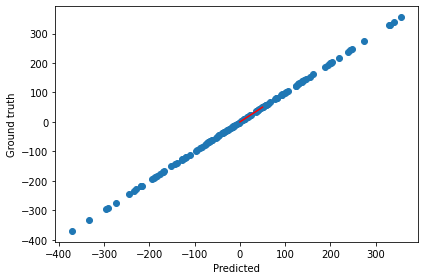

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(predicted, df.target)
plt.xlabel('Predicted')
plt.ylabel('Ground truth')
plt.plot([0, 50], [0, 50], color="red")
plt.tight_layout()